In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('emails.csv')

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.shape

(5172, 3002)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [8]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [9]:
# input data

x=df.drop(['Email No.','Prediction'],axis=1)

# output data

y=df['Prediction'] #target variable 

In [10]:
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [11]:
x.shape

(5172, 3000)

In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [13]:
y.shape

(5172,)

In [14]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

<AxesSubplot:xlabel='Prediction', ylabel='count'>

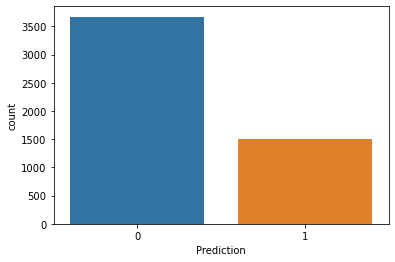

In [17]:
sns.countplot(x=y)

In [22]:
y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [23]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [27]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [29]:
#Cross Validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)

In [30]:
x_train.shape

(3879, 3000)

In [31]:
x_test.shape

(1293, 3000)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=5)

In [43]:
clf=knn.fit(x_train,y_train)

In [44]:
y_pred=clf.predict(x_test)

In [45]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [46]:
y_test

3324    0
15      0
4950    0
3964    1
2315    0
       ..
3551    0
1118    1
2239    0
1511    0
1240    1
Name: Prediction, Length: 1293, dtype: int64

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

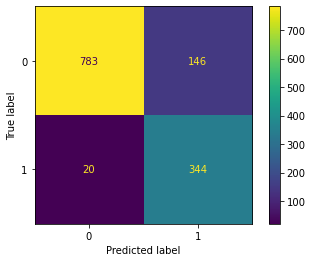

In [56]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [60]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [58]:
accuracy_score(y_test,y_pred)*100

87.1616395978345

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [72]:
from sklearn.svm import SVC

In [73]:
svm=SVC(kernel='linear')

In [75]:
clf3=svm.fit(x_train,y_train)

In [76]:
y_pred=clf3.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred)

0.9767981438515081

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       929
           1       0.95      0.97      0.96       364

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



In [79]:
svm=SVC(kernel='rbf')

In [80]:
clf4=svm.fit(x_train,y_train)

In [81]:
y_pred=clf4.predict(x_test)

In [82]:
accuracy_score(y_test,y_pred)

0.9450889404485692

In [85]:
svm=SVC(kernel='poly')

In [86]:
clf5=svm.fit(x_train,y_train)

In [87]:
y_pred=clf5.predict(x_test)

In [88]:
accuracy_score(y_test,y_pred)

0.7548337200309359

In [89]:
svm=SVC(kernel='sigmoid')

In [90]:
clf6=svm.fit(x_train,y_train)

In [91]:
y_pred=clf6.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

0.839907192575406